In [30]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os as os
import datetime
import seaborn as sns

sns.set_style('darkgrid')
sensor_labels = ['3.3V 10A', '12V 10A', 'Ext 12V 20A', 'USB-C 20V 5A']
line_color = ['b', 'r', 'm', 'k']

In [31]:
def plot_current_error(sensor, i_set, currents, cur_min, cur_max, ax):
    err_min = [cur_min[cnt] - i_set[cnt] for cnt in range(len(i_set))]
    err_max = [cur_max[cnt] - i_set[cnt] for cnt in range(len(i_set))]
    current_error = [currents[cnt] - i_set[cnt] for cnt in range(len(i_set))]
    ax.plot(i_set, err_max, linestyle='dashed',  c=line_color[sensor])
    ax.plot(i_set, current_error, label=sensor_labels[sensor], c=line_color[sensor])
    ax.plot(i_set, err_min, linestyle='dashed', c=line_color[sensor])
    ax.legend()
    ax.set(xlabel="Load current (A)", ylabel="Current Error (A)",
       title="Current errors")
    ax.grid(True)
    stri = f"Sensor: {sensor_labels[sensor]}; "    
    stri += f"min-max cur_AVG +/- {(np.max(current_error)-np.min(current_error))/2:4.3f} A;"
    stri += f" min-max cur_delta +/- {np.max(np.abs([err_max, err_min])):4.3f} A"
    print(stri) 

In [32]:
def plot_current_error2(sensor, i_set, currents, cur_min, cur_max, ax):
    err_min = np.abs([cur_min[cnt] - currents[cnt] for cnt in range(len(i_set))])
    err_max = [cur_max[cnt] - currents[cnt] for cnt in range(len(i_set))]
    current_error = [currents[cnt] - i_set[cnt] for cnt in range(len(i_set))]
    err=[err_min]+[err_max]
    ax.errorbar(i_set, current_error, yerr=err, capsize=4, c=line_color[sensor])
    ax.set(xlabel="Load current (A)", ylabel="Current Error (A)",
       title="Current errors")
    ax.grid(True)
    ax.legend()

In [33]:
def plot_v_drop(sensor, i_set, v_drop, ax):
    ax.plot(i_set, v_drop, label=sensor_labels[sensor], c=line_color[sensor])
    ax.set(xlabel="Load current (A)", ylabel="Voltage drop (V)",
           title="Voltage drop across sensor")
    ax.grid(True)
    ax.legend()

In [34]:
def plot_volt_error(sensor, i_set, voltages, volt_min, volt_max, ax):
    no_load = [i for i,x in enumerate(i_set) if x==0][0] 
    err_min = [volt_min[cnt] - voltages[no_load]  for cnt in range(len(i_set))]
    err_max = [volt_max[cnt] - voltages[no_load]  for cnt in range(len(i_set))]
    err=[err_min]+[err_max]
    ax.plot(i_set, err_max, linestyle='dashed',  c=line_color[sensor])
    ax.plot(i_set, voltages - voltages[no_load], label=sensor_labels[sensor], c=line_color[sensor])
    ax.plot(i_set, err_min, linestyle='dashed', c=line_color[sensor])
    ax.set(xlabel="Load current (A)", ylabel="Voltage (V)",
           title="Voltage errors")
    ax.grid(True)
    ax.legend()
    stri = f"Sensor: {sensor_labels[sensor]}; "
    stri += f"min-max volt_AVG +/- {(np.max(voltages - voltages[no_load])-np.min(voltages - voltages[no_load]))/2:4.3f} V; "
    stri += f"min-max volt_delta +/- {(np.max(err_max)-np.min(err_min))/2:4.3f} V"
    print(stri) 

In [35]:
def plot_volt_error_ex_cable(sensor, i_set, voltages, volt_min, volt_max, v_dmm, ax):
    
#    Rcable = (max(voltages)-min(voltages))/(max(i_set))
#    exp_volt = [max(voltages) - (Rcable * i_set[cnt]) for cnt in range(len(i_set))]
    err_min = [volt_min[cnt] - voltages[cnt]  for cnt in range(len(i_set))]
    err_max = [volt_max[cnt] - voltages[cnt]  for cnt in range(len(i_set))]
    err=[err_min]+[err_max]
#    volt_err = [voltages[cnt]-exp_volt[cnt] for cnt in range(len(voltages))]
    volt_err = [voltages[cnt]-v_dmm[cnt] for cnt in range(len(voltages))]
    
    ax.plot(i_set, err_max, linestyle='dashed',  c=line_color[sensor])
    ax.plot(i_set, volt_err, label=sensor_labels[sensor], c=line_color[sensor])
    ax.plot(i_set, err_min, linestyle='dashed', c=line_color[sensor])
    ax.set(xlabel="Load current (A)", ylabel="Voltage (V)",
           title="Voltage errors excluding cable loss")
    ax.grid(True)
    ax.legend()
    stri = f"Sensor: {sensor_labels[sensor]}; "
    stri += f"min-max volt_AVG +/- 0 V (By Definition); "
    stri += f"min-max volt_delta +/- {np.max(np.abs([err_max, err_min])):4.3f} V"
    print(stri) 

In [36]:
def plot_volt_error2(sensor, i_set, voltages, volt_min, volt_max, ax):
    no_load = [i for i,x in enumerate(i_set) if x==0][0] 
    err_min = np.abs([volt_min[cnt] - voltages[cnt]  for cnt in range(len(i_set))])
    err_max = [volt_max[cnt] - voltages[cnt]  for cnt in range(len(i_set))]
    err=[err_min]+[err_max]
    ax.errorbar(i_set, voltages - voltages[no_load], yerr=err, capsize=4, label=sensor_labels[sensor], c=line_color[sensor])
    ax.set(xlabel="Load current (A)", ylabel="Voltage (V)",
           title="Voltage errors")
    ax.grid(True)
    ax.legend()

In [37]:
def plot_resistance(sensor, i_set, v_drop, currents, ax):
    r_sens = [v_drop[i] / currents[i] for i in range(len(currents))]
    ax.plot(i_set, r_sens, label=sensor_labels[sensor], c=line_color[sensor])
    ax.set(xlabel="Load current (A)", ylabel="Resistance (Ohm)",
           title="Current sensor resistance")
    ax.grid(True)
    ax.legend()

In [38]:
def plot_power_error(sensor, i_set, voltages, powers, pwr_min, pwr_max, ax):
    no_load = [i for i,x in enumerate(i_set) if x==0][0] 
    expt_power = [i_set[i] * voltages[no_load] for i in range(len(i_set))]
    err_min = [expt_power[cnt] - pwr_min[cnt]  for cnt in range(len(i_set))]
    err_max = [expt_power[cnt] - pwr_max[cnt]  for cnt in range(len(i_set))]
    err_pwr = [expt_power[cnt] - powers[cnt] for cnt in range(len(i_set))]
    ax.plot(i_set, err_min, linestyle='dashed',  c=line_color[sensor])
    ax.plot(i_set, err_pwr, label=f"{sensor_labels[sensor]} AVG ", c=line_color[sensor])
    ax.plot(i_set, err_max, linestyle='dashed', label=f"{sensor_labels[sensor]} peak ", c=line_color[sensor])
    ax.set(xlabel="Load current (A)", ylabel="Power (W)",
           title="Power errors")
    ax.grid(True)
    ax.legend()
    stri = f"Sensor: {sensor_labels[sensor]}; "
    stri += f"min-max power_AVG +/- {((np.max(err_pwr)-np.min(err_pwr))/2):4.3f}W; "
    stri += f"min-max power_delta +/- {((np.max(err_max)-np.min(err_min))/2):4.3f}W"
    print(stri) 

In [39]:
def plot_power_error_ex_cable(sensor, i_set, voltages, powers, pwr_min, pwr_max, ax):
    no_load = [i for i,x in enumerate(i_set) if x==0][0] 
    expt_power = [i_set[i] * voltages[i] for i in range(len(i_set))]
    err_min = [expt_power[cnt] - pwr_min[cnt]  for cnt in range(len(i_set))]
    err_max = [expt_power[cnt] - pwr_max[cnt]  for cnt in range(len(i_set))]
    err_pwr = [expt_power[cnt] - powers[cnt] for cnt in range(len(i_set))]
    ax.plot(i_set, err_min, linestyle='dashed',  c=line_color[sensor])
    ax.plot(i_set, err_pwr, label=f"{sensor_labels[sensor]} AVG ", c=line_color[sensor])
    ax.plot(i_set, err_max, linestyle='dashed', label=f"{sensor_labels[sensor]} peak ", c=line_color[sensor])
    ax.set(xlabel="Load current (A)", ylabel="Power error (W)",
           title="Absolute power errors excluding cables")
    ax.grid(True)
    ax.legend(loc="upper right", ncol=2)
    ax.set_ylim(-6, 6)
    stri = f"Sensor: {sensor_labels[sensor]}; "
    stri += f"min-max power_AVG +/- {((np.max(err_pwr)-np.min(err_pwr))/2):4.3f}W; "
    stri += f"min-max power_delta +/- {np.max(np.abs([err_max, err_min])):4.3f}W"
    print(stri) 

In [40]:
def read_datafile(file_name):
    with open(file_name, newline='') as csvfile:
        data = []
        reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in reader:
            data.append(row)
    data = np.array(data[1:])
    volt = [float(dat) for dat in data.transpose()[4+1+sensor*3].flatten()]
    current = [float(dat) for dat in data.transpose()[4+sensor*3].flatten()]
    power = [volt[cnt]*current[cnt] for cnt in range(len(volt))]
    time = [float(dat) for dat in data.transpose()[1].flatten()]
    dtime = [float(dat) for dat in data.transpose()[2].flatten()]
    return volt, current, power, time, dtime

C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_37908\3694828429.py:25: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(fname, dtype=None, names=True, delimiter=',')


Sensor: Ext 12V 20A; min-max volt_AVG +/- 0 V (By Definition); min-max volt_delta +/- 0.319 V
Sensor: Ext 12V 20A; min-max cur_AVG +/- 0.013 A; min-max cur_delta +/- 0.360 A
Sensor: Ext 12V 20A; min-max power_AVG +/- 0.155W; min-max power_delta +/- 4.332W


C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_37908\3694828429.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_cur.show()
C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_37908\3694828429.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_volt.show()
C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_37908\3694828429.py:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_pwr.show()
C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_37908\3694828429.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_res.show()


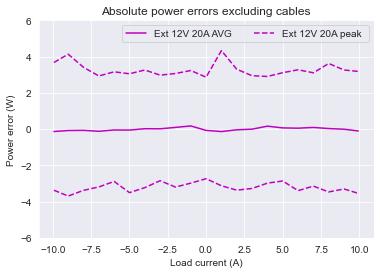

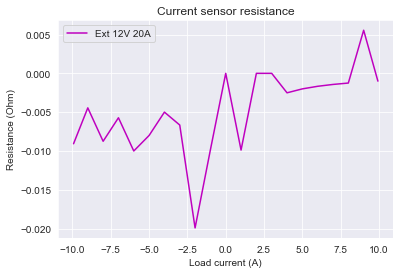

In [43]:
path_to_files = 'M:\VIEWlogic\Projects\PowerSensor\Measurements\Sweep_Set3' + '\\'
file_overview = 'Set3_3V3.csv'
#file_overview = 'Set3_12V.csv'
overview_files = ['Set3_PCIe.csv'] #['Set3_3V3.csv', 'Set3_12V.csv', 'Set3_PCIe.csv', 'Set2_USBC_20V.csv']
fig_cur, ax_cur = plt.subplots()
fig_volt, ax_volt = plt.subplots()
fig_pwr, ax_pwr = plt.subplots()
fig_res, ax_res = plt.subplots()
for file_overview in overview_files:
    fname = path_to_files + file_overview
    i_set=[]
    v_in=[]
    v_out=[]
    v_drop=[]
    currents=[]
    cur_max=[]
    cur_min=[]
    voltages=[]
    volt_max=[]
    volt_min=[]
    powers=[]
    pwr_max=[]
    pwr_min=[]
    set_currents = []
    data = np.genfromtxt(fname, dtype=None, names=True, delimiter=',')
    for measurement in data:
        data_list = list(measurement)
        i_set.append(data_list[0])
        v_in.append(data_list[1])
        v_out.append(data_list[2])
        v_drop.append(v_out[-1] - v_in[-1])
        data_file = data_list[3]
        sensor = data_list[4]

        file_name = path_to_files + data_file.decode('UTF-8')
        volt, current, power, time, dtime = read_datafile(file_name)
        voltages.append(np.mean(volt))
        volt_max.append(np.max(volt))
        volt_min.append(np.min(volt))
        currents.append(np.mean(current))
        cur_max.append(np.max(current))
        cur_min.append(np.min(current))
        powers.append(np.mean(power))
        pwr_max.append(np.max(power))
        pwr_min.append(np.min(power))
    v_mid = [(v_in[cnt] + v_out[cnt]) /2 for cnt in range(len(v_in))]
    if file_overview == 'Set2_USBC_20V.csv':
        sensor = 3
    plot_volt_error_ex_cable(sensor, i_set, voltages, volt_min, volt_max, v_mid, ax_volt)
    plot_current_error(sensor, i_set, currents, cur_min, cur_max, ax_cur)
    plot_power_error_ex_cable(sensor, i_set, voltages, powers, pwr_min, pwr_max, ax_pwr)
    plot_resistance(sensor, i_set, v_drop, currents, ax_res)
fig_cur.savefig("current_error.pdf")
fig_cur.show()
fig_volt.savefig("volt_error.pdf")
fig_volt.show()
fig_pwr.savefig("power_error.pdf")
fig_pwr.show()
fig_res.savefig("resistance.pdf")
fig_res.show()